<a href="https://colab.research.google.com/github/nasehacho/data-analytics-projects/blob/master/Unit_4_Mini_project_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK**

*   You will be working with a fake advertising data set,indicating whether or not a particular internet user clicked on an Advertisement.  
*   We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

Sections of project:

*   Overview
*   Data Exploration (EDA)
*   Data Preparation (Wrangling/Cleaning, etc.)
*   Build Model
*   Evaluate Model


## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import  metrics

## Get the Data
**Read in the advertising.csv file from this link and load it to a data frame called ad_data.**

https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv

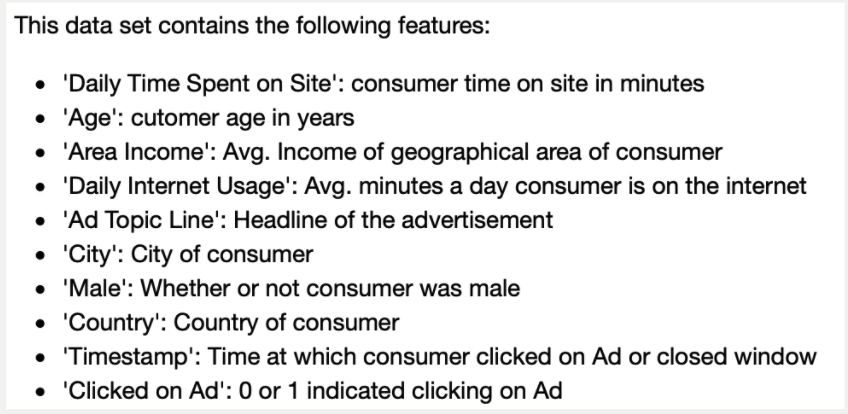

In [ ]:
ad_data = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

**Check the head of ad_data**

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [ ]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!

There are a couple of plots already created below. Try creating a histogram and a jointplot on different columns.

**Create a histogram of the Age (code provided)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


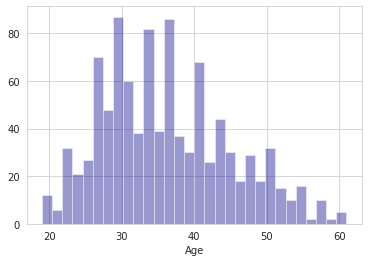

In [ ]:
sns.set_style("whitegrid") 
sns.distplot(ad_data['Age'].dropna(), kde=False, color='darkblue',bins=30)

**Create a histogram of the income. (on your own)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


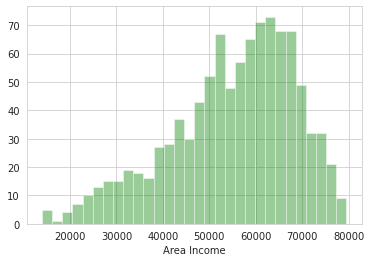

In [ ]:
sns.set_style("whitegrid") 
sns.distplot(ad_data['Area Income'].dropna(), kde=False, color='green',bins=30)

**Create a jointplot showing Area Income versus Age. (code provided)**

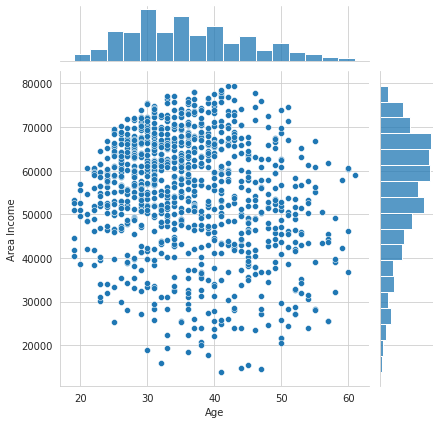

In [ ]:
sns.set_style("whitegrid") 
sns.jointplot(x='Age', y='Area Income', data=ad_data)

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage' (on your own)**

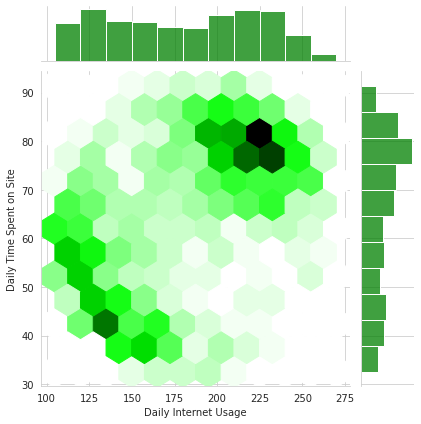

In [ ]:
sns.set_style("whitegrid") 
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', kind='hex', color='green', data=ad_data)

# Logistic Regression

Now it's time to do a train test split, and train the model.

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [ ]:
x = ad_data[['Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0) 

**Train and fit a logistic regression model on the training set.**

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [ ]:
predict = logmodel.predict(x_test)


**Create a classification report and confusion matrix for the model.**

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.65      0.84      0.74       108
           1       0.72      0.48      0.58        92

    accuracy                           0.68       200
   macro avg       0.69      0.66      0.66       200
weighted avg       0.69      0.68      0.66       200



In [ ]:
print(confusion_matrix(y_test, predict))

[[91 17]
 [48 44]]


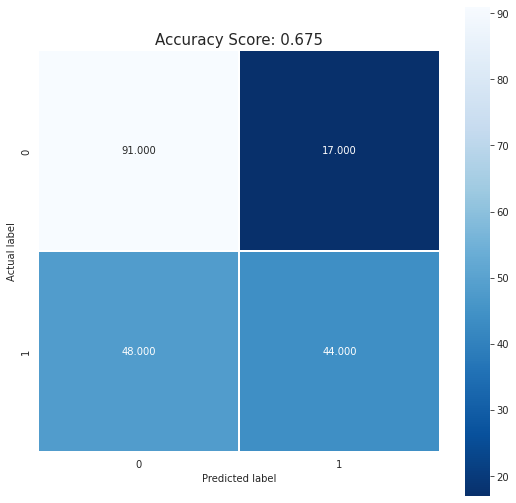

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

**CONCLUSIONS/OBSERVATIONS**



*   Based off of the confusion matrix, the model that had been created may not be the best model since there are many false negatives and false positives, resulting in an accuracy score of 0.675. 
*   According to the classification report, 69 percent of the predictions had been correct and about 66 percent of the positive predictions were correct which again shows how this may not be a great model for this dataset. 

